In [71]:
#import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sklearn
from sklearn import preprocessing

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

#restaurants = pd.read_csv('List of restaurants.csv') 
#file = open('List of restaurants.csv')

#for line in file:
    #print(line)
    #line_separated = line.split(',')
    #print(line_separated)

In [57]:
restaurants = pd.read_csv('List of restaurants.csv') 

### This is to display the top 10

In [58]:
restaurants.head(10)

,Name,Cuisine,Food Nutrition Score,Distance (km),Price for one meal (per pax/per set)
0,Family Yong Tau Foo,Oriental,0.50,5.5,7.0
1,Weng Soon Bak Kut Teh,Oriental,0.70,1.9,6.5
2,Weng Soon Lotus Root,Oriental,0.40,1.9,7.0
3,Weng Soon Fried Chicken + Rice set,Western,0.95,1.9,7.0
4,Weng Soon Jawa Mee,Oriental,0.75,1.9,6.0
5,Weng Soon Satay,Malay,0.90,1.9,10.0
6,Weng Soon Char Kuey Teow,Oriental,0.95,1.9,6.5
7,PizzaHut (USJ 9),Italian,0.30,7.0,11.0
8,Dominos (Alam Megah),Italian,0.20,3.2,11.7
9,Sri Melur,Mamak,0.80,1.9,8.0


In [59]:
restaurants.sort_values('Price for one meal (per pax/per set)', ascending=True).head()

,Name,Cuisine,Food Nutrition Score,Distance (km),Price for one meal (per pax/per set)
22,Uncle Jack (Giant USJ),Western,0.65,7.5,4.2
33,SS19 Penang Favorites Hokkien Mee,Oreintal,0.80,7.9,5.5
4,Weng Soon Jawa Mee,Oriental,0.75,1.9,6.0
34,SS19 Penang Favorites Loh Mee,Oriental,0.75,7.9,6.0
1,Weng Soon Bak Kut Teh,Oriental,0.70,1.9,6.5


In [60]:
restaurants['Food Nutrition Score']=(restaurants['Food Nutrition Score']-restaurants['Food Nutrition Score'].min())/(restaurants['Food Nutrition Score'].max()-restaurants['Food Nutrition Score'].min())
restaurants['Distance (km)']=(restaurants['Distance (km)']-restaurants['Distance (km)'].min())/(restaurants['Distance (km)'].max()-restaurants['Distance (km)'].min())
restaurants['Price for one meal (per pax/per set)']=(restaurants['Price for one meal (per pax/per set)']-restaurants['Price for one meal (per pax/per set)'].min())/(restaurants['Price for one meal (per pax/per set)'].max()-restaurants['Price for one meal (per pax/per set)'].min())

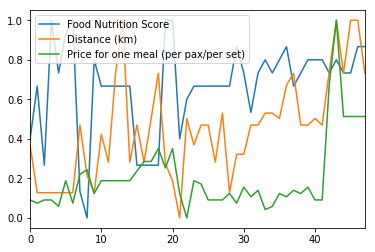

In [61]:
restaurants.plot()

<BarContainer object of 48 artists>

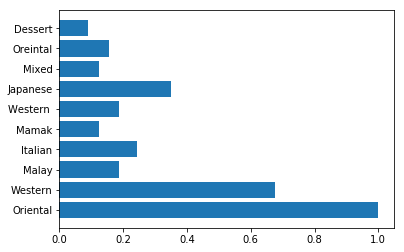

In [62]:
plt.barh(restaurants['Cuisine'],restaurants['Price for one meal (per pax/per set)'])

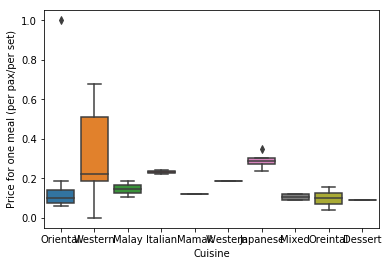

In [63]:
plot = sns.boxplot(x='Cuisine', y='Price for one meal (per pax/per set)', data=restaurants )

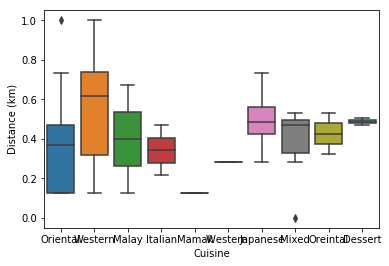

In [64]:
plot = sns.boxplot(x='Cuisine', y='Distance (km)', data=restaurants )

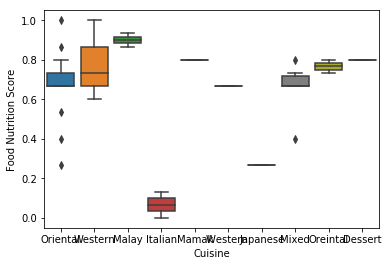

In [65]:
plot = sns.boxplot(x='Cuisine', y='Food Nutrition Score', data=restaurants )

In [69]:
int_similarity = cosine_similarity(restaurants[['Distance (km)', 'Food Nutrition Score' , 'Price for one meal (per pax/per set)']])

In [72]:
restaurant_num = restaurants[['Distance (km)', 'Food Nutrition Score' , 'Price for one meal (per pax/per set)']]

In [74]:
restaurant_num.head()

,Distance (km),Food Nutrition Score,Price for one meal (per pax/per set)
0,0.369128,0.400000,0.090909
1,0.127517,0.666667,0.074675
2,0.127517,0.266667,0.090909
3,0.127517,1.000000,0.090909
4,0.127517,0.733333,0.058442


In [96]:
euclidean_array =  euclidean_distances(restaurant_num, [[1, 0, 1]])

smallest_euclidean = np.min(euclidean_array) 
smallest_euclidean_index = np.argmin(euclidean_array)

In [97]:
smallest_euclidean_index

18

In [98]:
restaurants.iloc[18, :]

Name                                    Sakae Sushi (Subang Parade)
Cuisine                                                    Japanese
Food Nutrition Score                                       0.266667
Distance (km)                                              0.731544
Price for one meal (per pax/per set)                       0.350649
Name: 18, dtype: object